In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [3]:
total_data = pd.read_csv('covid_19_india.csv')
total_data.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [23]:
confirmed_cases = total_data[['Confirmed', 'State/UnionTerritory', 'Date']]

In [24]:
confirmed_cases.dropna(subset=['Confirmed'], inplace=True)

<ipython-input-24-4641ecf89ad8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  confirmed_cases.dropna(subset=['Confirmed'], inplace=True)


In [25]:
confirmed_cases

,Confirmed,State/UnionTerritory,Date
0,1.0,Kerala,2020-01-30
1,1.0,Kerala,2020-01-31
2,2.0,Kerala,2020-02-01
3,3.0,Kerala,2020-02-02
4,3.0,Kerala,2020-02-03
...,...,...,...
15081,536766.0,Telangana,2021-05-19
15082,42776.0,Tripura,2021-05-19
15083,295790.0,Uttarakhand,2021-05-19
15084,1637663.0,Uttar Pradesh,2021-05-19


In [28]:
confirmed_cases.sort_values(by=['State/UnionTerritory', 'Date'])

,Confirmed,State/UnionTerritory,Date
365,1.0,Andaman and Nicobar Islands,2020-03-26
392,1.0,Andaman and Nicobar Islands,2020-03-27
420,6.0,Andaman and Nicobar Islands,2020-03-28
447,9.0,Andaman and Nicobar Islands,2020-03-29
474,9.0,Andaman and Nicobar Islands,2020-03-30
...,...,...,...
14941,1094802.0,West Bengal,2021-05-15
14977,1114313.0,West Bengal,2021-05-16
15013,1133430.0,West Bengal,2021-05-17
15049,1152433.0,West Bengal,2021-05-18


In [29]:
confirmed_cases_PB = confirmed_cases.loc[confirmed_cases['State/UnionTerritory'] == 'Punjab']

In [32]:
confirmed_cases_PB

,Confirmed,State/UnionTerritory,Date
77,1.0,Punjab,2020-03-09
92,1.0,Punjab,2020-03-10
107,1.0,Punjab,2020-03-11
118,1.0,Punjab,2020-03-12
131,1.0,Punjab,2020-03-13
...,...,...,...
14933,483984.0,Punjab,2021-05-15
14969,490755.0,Punjab,2021-05-16
15005,497705.0,Punjab,2021-05-17
15041,504586.0,Punjab,2021-05-18


In [54]:
PB_X = confirmed_cases_PB.Date

In [55]:
PB_Y = confirmed_cases_PB.Confirmed

In [57]:
import datetime as dt
PB_X = pd.to_datetime(PB_X)
PB_X=PB_X.map(dt.datetime.toordinal)

In [58]:
PB_X

77       737493
92       737494
107      737495
118      737496
131      737497
          ...  
14933    737925
14969    737926
15005    737927
15041    737928
15077    737929
Name: Date, Length: 437, dtype: int64

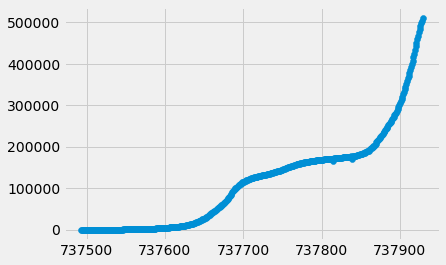

In [59]:
plt.scatter(PB_X, PB_Y )
plt.show()

In [60]:
reg = LinearRegression()

In [85]:
X_train, X_test, y_train, y_test = train_test_split(PB_X, PB_Y, test_size=0.4, random_state=0)

In [86]:
PB_X.values

array([737493, 737494, 737495, 737496, 737497, 737498, 737499, 737500,
       737501, 737502, 737503, 737504, 737505, 737506, 737507, 737508,
       737509, 737510, 737511, 737512, 737513, 737514, 737515, 737516,
       737517, 737518, 737519, 737520, 737521, 737522, 737523, 737524,
       737525, 737526, 737527, 737528, 737529, 737530, 737531, 737532,
       737533, 737534, 737535, 737536, 737537, 737538, 737539, 737540,
       737541, 737542, 737543, 737544, 737545, 737546, 737547, 737548,
       737549, 737550, 737551, 737552, 737553, 737554, 737555, 737556,
       737557, 737558, 737559, 737560, 737561, 737562, 737563, 737564,
       737565, 737566, 737567, 737568, 737569, 737570, 737571, 737572,
       737573, 737574, 737575, 737576, 737577, 737578, 737579, 737580,
       737581, 737582, 737583, 737584, 737585, 737586, 737587, 737588,
       737589, 737590, 737591, 737592, 737593, 737594, 737595, 737596,
       737597, 737598, 737599, 737600, 737601, 737602, 737603, 737604,
      

In [87]:
reg.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [89]:
reg.score(X_test.values.reshape(-1, 1), y_test)

0.8369510972464262

In [90]:
y_pred = reg.predict(X_test.values.reshape(-1, 1))

In [91]:
y_pred

array([ 1.50660217e+05,  1.66756368e+05,  1.99795836e+05,  1.07454758e+05,
       -2.30087824e+04, -5.85897480e+04,  6.59436317e+04,  2.65874772e+05,
        2.49778621e+05,  1.98948670e+05, -6.02840797e+04,  2.50625787e+05,
        2.56555948e+05,  1.05760427e+05,  1.70145031e+05,  3.00608572e+05,
       -3.74106018e+04,  1.25721833e+04,  1.71839363e+05,  5.15418123e+04,
        2.97219908e+05,  7.61096219e+04,  9.89830998e+04,  1.04913261e+05,
       -5.09652554e+04,  2.64180440e+05,  2.42154128e+05,  1.00677431e+05,
        2.31988138e+05,  2.28599475e+05,  2.95525577e+05, -6.79085723e+04,
       -4.37113370e+03,  2.10808992e+05,  2.06573162e+05, -2.13144507e+04,
        2.23516479e+05,  7.48918817e+03,  4.47644855e+04,  2.08267494e+05,
        6.08606366e+04,  2.98067074e+05,  6.42493000e+04,  2.18910076e+04,
        3.62928270e+04,  7.01794609e+04,  1.59608467e+04,  1.58284709e+05,
        2.41306962e+05,  2.69740027e+04, -5.60482504e+04,  1.38799895e+05,
        1.28633904e+05,  

In [92]:
ma = mean_absolute_error(y_test, y_pred)
ma

30604.92529836995

In [93]:
mean_squared_error(y_test, y_pred)

2052869012.4619942

In [94]:
reg.predict(np.array(737930).reshape(-1, 1))

array([301455.73748612])